## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

#I already extracted the train file, hence not executing this step


Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd
label = pd.read_csv('/content/labels.csv')

In [8]:
label.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [9]:
label['breed'].value_counts()
#there are intotal 120 breeds of dog

scottish_deerhound                126
maltese_dog                       117
afghan_hound                      116
entlebucher                       115
bernese_mountain_dog              114
shih-tzu                          112
pomeranian                        111
great_pyrenees                    111
basenji                           110
samoyed                           109
tibetan_terrier                   107
airedale                          107
leonberg                          106
cairn                             106
beagle                            105
japanese_spaniel                  105
blenheim_spaniel                  102
miniature_pinscher                102
australian_terrier                102
irish_wolfhound                   101
saluki                             99
lakeland_terrier                   99
papillon                           96
siberian_husky                     95
whippet                            95
norwegian_elkhound                 95
pug         

There are 120 breeds of dog that we need to classify

### Get one-hot encodings of labels

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
enc = LabelEncoder()

In [12]:
label_enc = enc.fit_transform(label['breed'].values.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
len(label_enc)

10222

In [14]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
Y1 = to_categorical(label_enc,num_classes = 120)

In [16]:
Y1.shape

(10222, 120)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
import cv2

In [0]:
image = []
for i in list(label['id']):
  dummy = cv2.imread('/content/train/{}.jpg'.format(i))
  img_rs = cv2.resize(dummy,(128,128))
  image.append(img_rs)

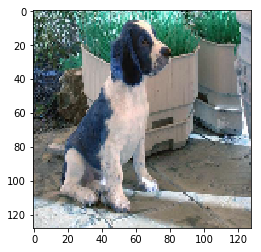

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(image[123])

In [20]:
X = np.array(image)
X.shape

(10222, 128, 128, 3)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2, random_state=2)
print (len(x_train))
print (len(x_test))

8177
2045


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
import pandas as pd
SS = pd.read_csv('/content/sample_submission.csv')

In [0]:
image_test = []
for i in list(SS['id']):
  dummy = cv2.imread('/content/test/{}.jpg'.format(i))
  img_t = cv2.resize(dummy,(128,128))
  image_test.append(img_t)

Run the below code to load the test image files in x_test_feature

In [0]:
#from tqdm import tqdm
#x_test_feature = []
#i = 0 # initialisation
#for f in tqdm(image_test.values): # f for format ,jpg
#    img = cv2.imread('./test/{}.jpg'.format(f), 0)
#    img_resize = cv2.resize(img, (img_rows, img_cols)) 
#    x_test_feature.append(img_resize)

this portion of code is not needed as we donot have the labels of test dataset.

Normalize the test data and convert it into 4 dimensions

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from keras.models import Sequential,Model
from keras.layers import Convolution2D, Dropout, Dense
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import adam

In [25]:
model = Sequential()
model.add(BatchNormalization(input_shape = (128,128,3)))
model.add(Convolution2D(64, (5,5), activation ='relu', input_shape = (128, 128, 3)))
model.add(Convolution2D(64, (3,3), activation ='relu'))
model.add(Flatten()) 
# fully connected layer
model.add(Dense(units=256,activation = 'relu'))
model.add(Dense(units=120,activation = 'softmax'))

W0805 16:54:07.142591 140538132342656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 16:54:07.185919 140538132342656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 16:54:07.206280 140538132342656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0805 16:54:07.207748 140538132342656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0805 16:54:07.209851 1405381

In [26]:
optimizer = adam(lr=0.001)
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

W0805 16:54:20.166207 140538132342656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### Use batch_size = 128 and epochs = 10 and execute the model

In [27]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, y_test))

W0805 16:54:25.639232 140538132342656 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 42s 5ms/step - loss: 15.8319 - acc: 0.0067 - val_loss: 16.0472 - val_acc: 0.0044
Epoch 2/10
8177/8177 [==============================] - 28s 3ms/step - loss: 15.9998 - acc: 0.0073 - val_loss: 16.0472 - val_acc: 0.0044
Epoch 3/10
8177/8177 [==============================] - 28s 3ms/step - loss: 15.9998 - acc: 0.0073 - val_loss: 16.0472 - val_acc: 0.0044
Epoch 4/10
8177/8177 [==============================] - 28s 3ms/step - loss: 15.9998 - acc: 0.0073 - val_loss: 16.0472 - val_acc: 0.0044
Epoch 5/10
8177/8177 [==============================] - 28s 3ms/step - loss: 15.9998 - acc: 0.0073 - val_loss: 16.0472 - val_acc: 0.0044
Epoch 6/10
8177/8177 [==============================] - 29s 3ms/step - loss: 15.9998 - acc: 0.0073 - val_loss: 16.0472 - val_acc: 0.0044
Epoch 7/10
8177/8177 [==============================] - 29s 4ms/step - loss: 15.9998 - acc: 0.0073 - val_loss: 16.0472 - val_acc: 

In [0]:
##very poor accuracy!!

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [28]:
from keras.preprocessing.image import ImageDataGenerator

EPOCHS = 10
BS = 32

# construct the training image generator for data augmentation
aug = ImageDataGenerator(rescale=1./255, rotation_range=30, zoom_range=0.2,
	width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2,
	horizontal_flip=True, vertical_flip=True, fill_mode="nearest")
 
# train the network
model.fit_generator(aug.flow(x_train, y_train, batch_size=BS),
	validation_data=(x_test, y_test), steps_per_epoch=len(x_train) // BS,
	epochs=EPOCHS)

Epoch 1/10
255/255 [==============================] - 60s 235ms/step - loss: 15.9996 - acc: 0.0074 - val_loss: 16.0472 - val_acc: 0.0044
Epoch 2/10
255/255 [==============================] - 59s 233ms/step - loss: 15.9996 - acc: 0.0074 - val_loss: 16.0472 - val_acc: 0.0044
Epoch 3/10
255/255 [==============================] - 59s 231ms/step - loss: 15.9996 - acc: 0.0074 - val_loss: 16.0472 - val_acc: 0.0044
Epoch 4/10
255/255 [==============================] - 59s 231ms/step - loss: 16.0016 - acc: 0.0072 - val_loss: 16.0472 - val_acc: 0.0044
Epoch 5/10
255/255 [==============================] - 59s 231ms/step - loss: 16.0016 - acc: 0.0072 - val_loss: 16.0472 - val_acc: 0.0044
Epoch 6/10
255/255 [==============================] - 59s 231ms/step - loss: 15.9959 - acc: 0.0076 - val_loss: 16.0472 - val_acc: 0.0044
Epoch 7/10
255/255 [==============================] - 59s 231ms/step - loss: 16.0016 - acc: 0.0072 - val_loss: 16.0472 - val_acc: 0.0044
Epoch 8/10
255/255 [=====================

The accuracy is even poorer compared to my previous run!!

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

**Already performed in the above step**
The accuracy for both plain neural network and data aug didnt help and got poor accuracy level. Also the training time is very high

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [29]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('/content/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

W0805 17:10:03.292678 140538132342656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Print the summary of the base_model

In [30]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
VGG = base_model.output
#VGG = Flatten()(VGG)
VGG = Dense(1024, activation='relu')(VGG)
VGG = Dense(256, activation='relu')(VGG)
VGG_pred = Dense(120, activation='softmax')(VGG)

## Not sure why the flatten step is giving error wherein its expecting three dimension and getting 2

In [32]:
base_model.layers

### Make all the layers in the base_model (VGG16) to be non-trainable

In [33]:
for layer in base_model.layers:
  print(layer.name)
  if('Dense' not in layer.name):
    print(layer.name)
    layer.trainable = False
 ## There is NO dense layer in the model. whi is that so? how to find the dense layers?

input_1
input_1
block1_conv1
block1_conv1
block1_conv2
block1_conv2
block1_pool
block1_pool
block2_conv1
block2_conv1
block2_conv2
block2_conv2
block2_pool
block2_pool
block3_conv1
block3_conv1
block3_conv2
block3_conv2
block3_conv3
block3_conv3
block3_pool
block3_pool
block4_conv1
block4_conv1
block4_conv2
block4_conv2
block4_conv3
block4_conv3
block4_pool
block4_pool
block5_conv1
block5_conv1
block5_conv2
block5_conv2
block5_conv3
block5_conv3
block5_pool
block5_pool
global_average_pooling2d_1
global_average_pooling2d_1


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [34]:
model1 = Model(input = base_model.input, output=VGG_pred)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [0]:
optimizer = adam(lr=0.01)
model1.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [36]:
model1.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 26s 3ms/step - loss: 6.3994 - acc: 0.0619 - val_loss: 4.1995 - val_acc: 0.0949
Epoch 2/10
8177/8177 [==============================] - 16s 2ms/step - loss: 3.3770 - acc: 0.2174 - val_loss: 3.0789 - val_acc: 0.2636
Epoch 3/10
8177/8177 [==============================] - 16s 2ms/step - loss: 2.2586 - acc: 0.4223 - val_loss: 2.6985 - val_acc: 0.3369
Epoch 4/10
8177/8177 [==============================] - 16s 2ms/step - loss: 1.6449 - acc: 0.5445 - val_loss: 2.6455 - val_acc: 0.3628
Epoch 5/10
8177/8177 [==============================] - 16s 2ms/step - loss: 1.1845 - acc: 0.6637 - val_loss: 2.5551 - val_acc: 0.3951
Epoch 6/10
8177/8177 [==============================] - 16s 2ms/step - loss: 0.7920 - acc: 0.7837 - val_loss: 2.7232 - val_acc: 0.3966
Epoch 7/10
8177/8177 [==============================] - 16s 2ms/step - loss: 0.4984 - acc: 0.8672 - val_loss: 2.8154 - val_acc: 0.3912
Epoch 8

In [37]:
##Trying out Data aug with VGG weigths to further improve accuracy
from keras.preprocessing.image import ImageDataGenerator

EPOCHS = 10
BS = 128

# construct the training image generator for data augmentation
VGG_aug = ImageDataGenerator(rescale=1./255, rotation_range=30, zoom_range=0.3,
	width_shift_range=0.15, height_shift_range=0.15, shear_range=0.3,
	horizontal_flip=True, vertical_flip=True, fill_mode="nearest")
 
# train the network
model1.fit_generator(VGG_aug.flow(x_train, y_train, batch_size=BS),
	validation_data=(x_test, y_test), steps_per_epoch=len(x_train) // BS,
	epochs=EPOCHS)

Epoch 1/10
63/63 [==============================] - 31s 496ms/step - loss: 4.6847 - acc: 0.0269 - val_loss: 4.0892 - val_acc: 0.3726
Epoch 2/10
63/63 [==============================] - 30s 470ms/step - loss: 4.5312 - acc: 0.0403 - val_loss: 5.0223 - val_acc: 0.3496
Epoch 3/10
63/63 [==============================] - 30s 474ms/step - loss: 4.3779 - acc: 0.0586 - val_loss: 6.9206 - val_acc: 0.3071
Epoch 4/10
63/63 [==============================] - 30s 481ms/step - loss: 4.2311 - acc: 0.0782 - val_loss: 8.3873 - val_acc: 0.2675
Epoch 5/10
63/63 [==============================] - 30s 472ms/step - loss: 4.1069 - acc: 0.0857 - val_loss: 9.6427 - val_acc: 0.2347
Epoch 6/10
63/63 [==============================] - 30s 480ms/step - loss: 4.0368 - acc: 0.0896 - val_loss: 10.2343 - val_acc: 0.2103
Epoch 7/10
63/63 [==============================] - 30s 477ms/step - loss: 3.9547 - acc: 0.1025 - val_loss: 10.8148 - val_acc: 0.2054
Epoch 8/10
63/63 [==============================] - 30s 470ms/step 

The overall accuracy using VGG is also poor. As we are not allowed tune, hence I ouldn't try more. I feel we should have more neural layers and can play with the hyperparameters to try.
Even Data aug using VGG hasn't improved the accuracy

Though the training accuracy is good but the validation accuracy os poor which shows its underfit.